# Predicting housing price with ANN | HyperParameter

## Introduction

This codes builds a model to precit housing price in London with ANN.

### Read in the data

(Data sourced from [Kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset) with a CC0 licence)

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend


In [2]:
#read in the data (from kaggle)
dataset = pd.read_csv('Housing.csv')

In [3]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
dataset.shape

(545, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Visualise the data

In [2]:
#plot the distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(dataset['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

NameError: name 'pd' is not defined

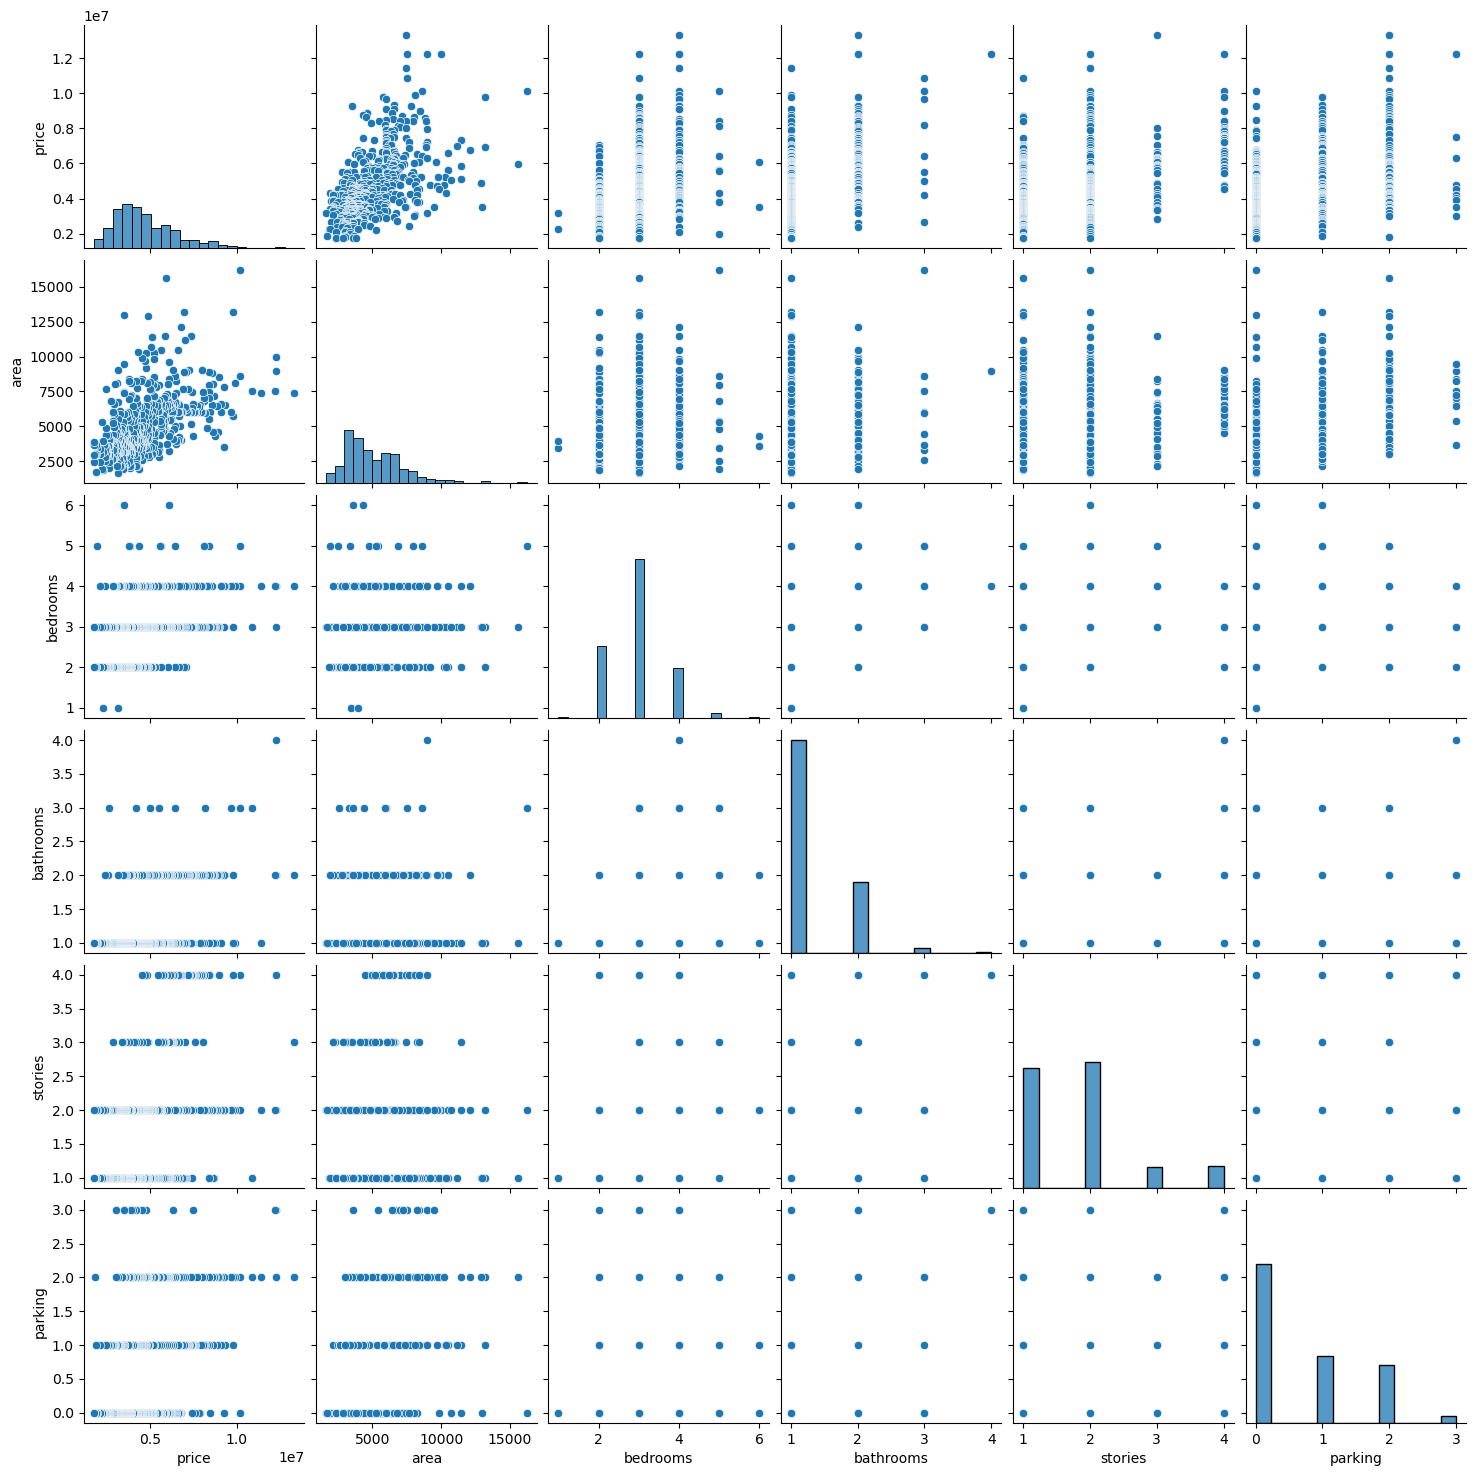

In [22]:
# Understanding Relationship between Numerical Columns
sns.pairplot(dataset[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.show()

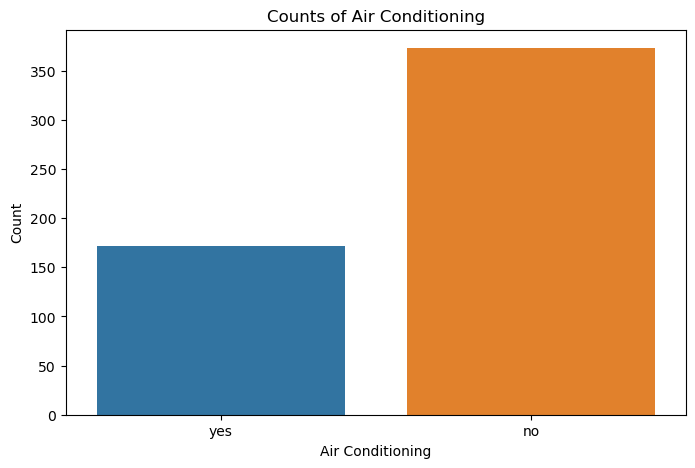

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='airconditioning', data=dataset)
plt.title('Counts of Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Count')
plt.show()

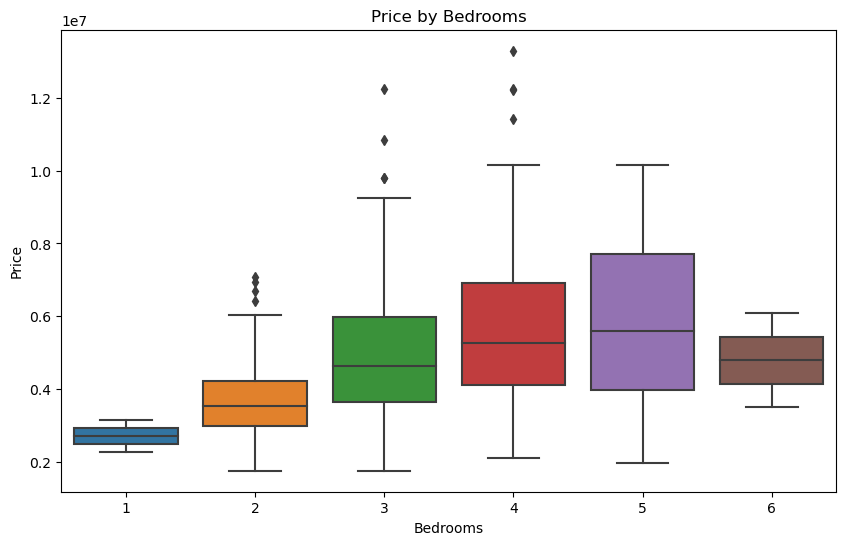

In [24]:
 # Relationship between 2 features
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=dataset)
plt.title('Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

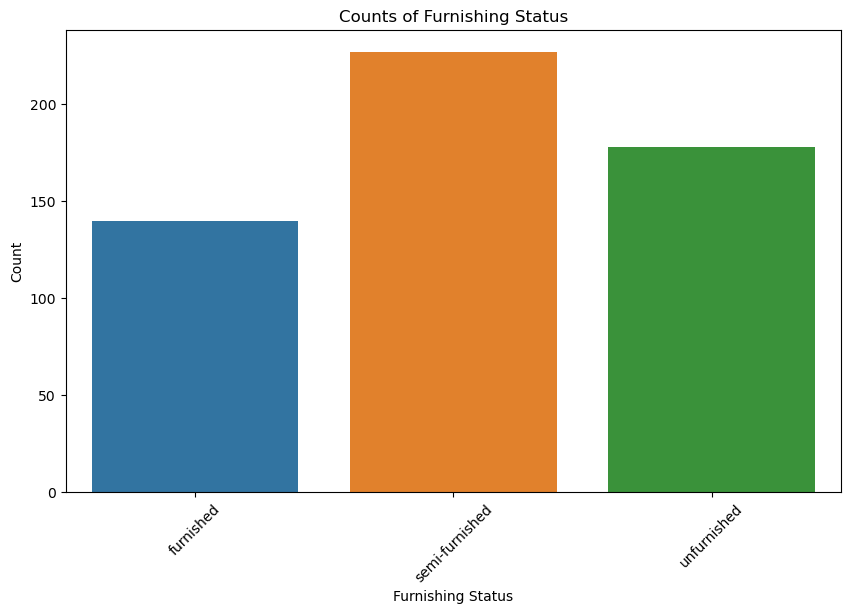

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='furnishingstatus', data=dataset)
plt.title('Counts of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

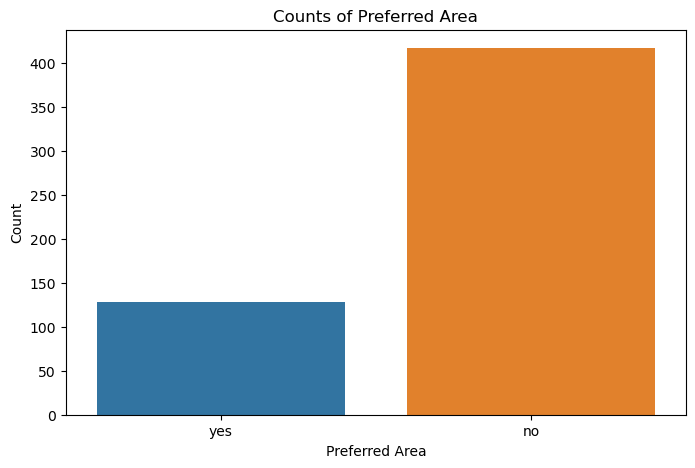

In [26]:
# Example for 'prefarea' variable
plt.figure(figsize=(8, 5))
sns.countplot(x='prefarea', data=dataset)
plt.title('Counts of Preferred Area')
plt.xlabel('Preferred Area')
plt.ylabel('Count')
plt.show()

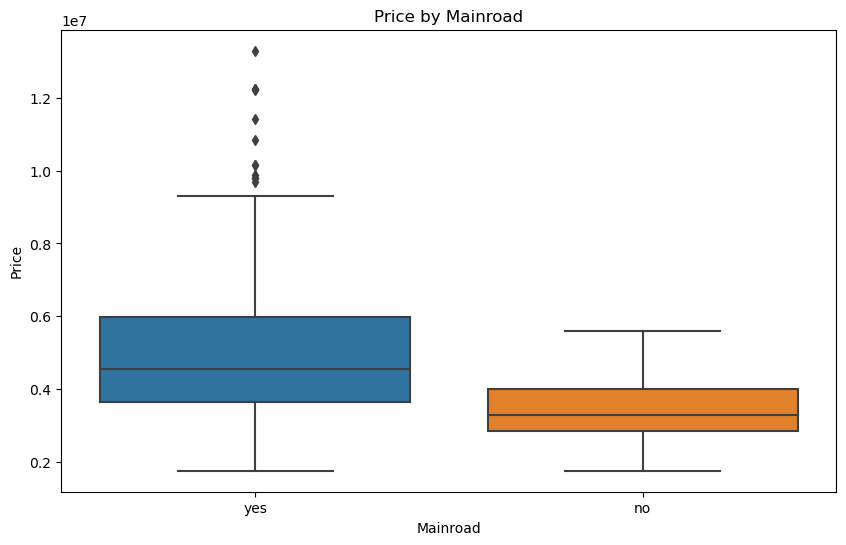

In [27]:
# Example: Boxplot for 'price' by 'mainroad'
plt.figure(figsize=(10, 6))
sns.boxplot(x='mainroad', y='price', data=dataset)
plt.title('Price by Mainroad')
plt.xlabel('Mainroad')
plt.ylabel('Price')
plt.show()

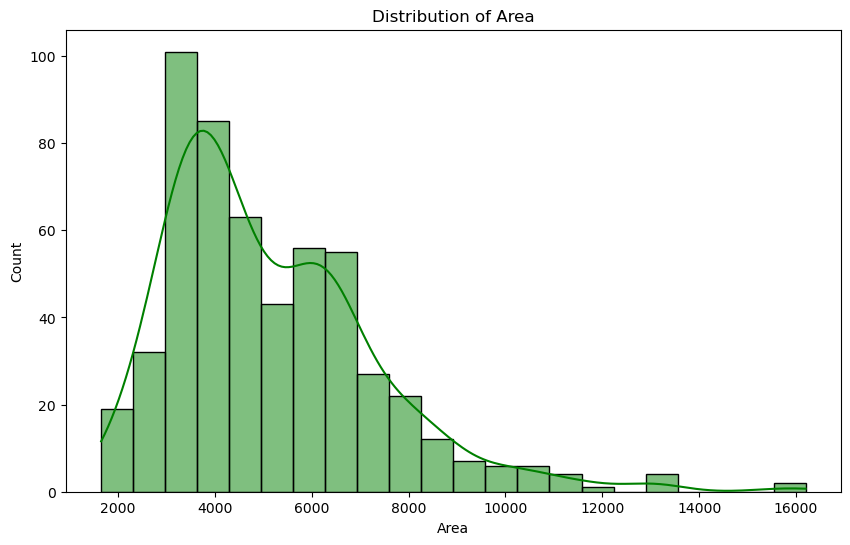

In [28]:
# Example for 'area' variable
plt.figure(figsize=(10, 6))
sns.histplot(dataset['area'], kde=True, color='green')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

### Creating dummy variables from categorical variables

In [3]:
encoded_data = pd.get_dummies(dataset,columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])
encoded_data.columns

NameError: name 'pd' is not defined

### Visualise correlation

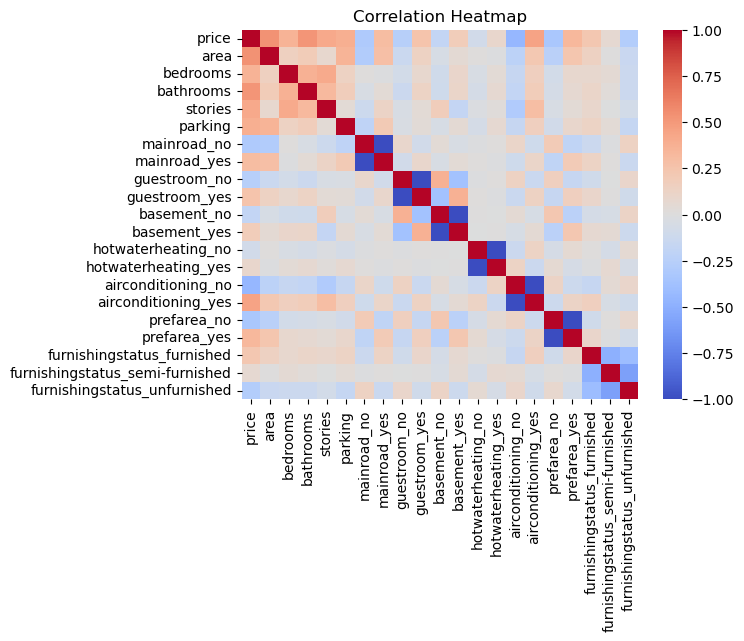

In [30]:
sns.heatmap(encoded_data.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
#Dividing Target and Features
X = encoded_data.drop(['price'],axis=1)
Y = encoded_data['price']

In [32]:
#Feature scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [33]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y,
test_size=0.2, random_state=100)

### model building

In [1]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(20,)))

    hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
    hp_activation1 = hp.Choice('activation1', values=['relu', 'tanh', 'sigmoid'])

    model.add(layers.Dense(units=hp_units1, activation=hp_activation1))

    hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
    hp_activation2 = hp.Choice('activation2', values=['relu', 'tanh', 'sigmoid'])

    model.add(layers.Dense(units=hp_units2, activation=hp_activation2))

    model.add(layers.Dense(1, activation='linear'))  

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

    return model

In [35]:
#Hyperparameter Tuning
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='my_project'
)

In [36]:
tuner.search(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Trial 10 Complete [00h 00m 02s]
val_loss: 22421957159594.668

Best val_loss So Far: 8911065535829.334
Total elapsed time: 00h 00m 22s


In [37]:
tuner.results_summary()

Results summary
Results in my_dir/my_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 04 summary
Hyperparameters:
units1: 320
activation1: relu
units2: 416
activation2: relu
learning_rate: 0.01
Score: 8911065535829.334

Trial 09 summary
Hyperparameters:
units1: 480
activation1: sigmoid
units2: 512
activation2: relu
learning_rate: 0.01
Score: 22421957159594.668

Trial 03 summary
Hyperparameters:
units1: 352
activation1: tanh
units2: 384
activation2: relu
learning_rate: 0.001
Score: 25144060455594.668

Trial 08 summary
Hyperparameters:
units1: 32
activation1: relu
units2: 288
activation2: sigmoid
learning_rate: 0.01
Score: 25154771309909.332

Trial 06 summary
Hyperparameters:
units1: 128
activation1: sigmoid
units2: 64
activation2: relu
learning_rate: 0.001
Score: 25157720604672.0

Trial 02 summary
Hyperparameters:
units1: 352
activation1: relu
units2: 64
activation2: tanh
learning_rate: 0.01
Score: 25157826161322.668

Trial 01 summary
Hyperparameters:
un

### Retrain the model

In [38]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
best_model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
14/14 [==============================] - 0s 5ms/step - loss: 8918339158016.0000 - mean_absolute_error: 2728413.2500 - val_loss: 6822527238144.0000 - val_mean_absolute_error: 2307374.0000
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 6938925465600.0000 - mean_absolute_error: 2335851.2500 - val_loss: 5902219870208.0000 - val_mean_absolute_error: 2156511.5000
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 5853412327424.0000 - mean_absolute_error: 2124269.7500 - val_loss: 5275983020032.0000 - val_mean_absolute_error: 2013461.7500
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 5010391302144.0000 - mean_absolute_error: 1944130.5000 - val_loss: 4585375137792.0000 - val_mean_absolute_error: 1849835.6250
Epoch 5/50
14/14 [==============================] - 0s 3ms/step - loss: 4292837900288.0000 - mean_absolute_error: 1777325.1250 - val_loss: 3929700302848.0000 - val_mean_absolute_error: 1683031.0000
Epoch 6/50

In [39]:
#evaluation matrices
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print(f'MAE: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print(f'MSE: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
rmsle = mean_squared_log_error(Y_test, y_pred, squared=False)
print(f'RMSLE: {rmsle}')

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(Y_test, y_pred)
print(f'R-squared (R2): {r2}')

4/4 [==============================] - 0s 838us/step
MAE: 4650728.357798165
MSE: 25158755127441.367
RMSE: 5015850.389260167
RMSLE: 14.587722738763139
R-squared (R2): -6.128174385493444
